Epoch 0, Loss: 0.2512
Epoch 200, Loss: 0.2174
Epoch 400, Loss: 0.0677
Epoch 600, Loss: 0.0141
Epoch 800, Loss: 0.0067

Final Predictions:
Input A predicted as A
Input B predicted as B
Input C predicted as C


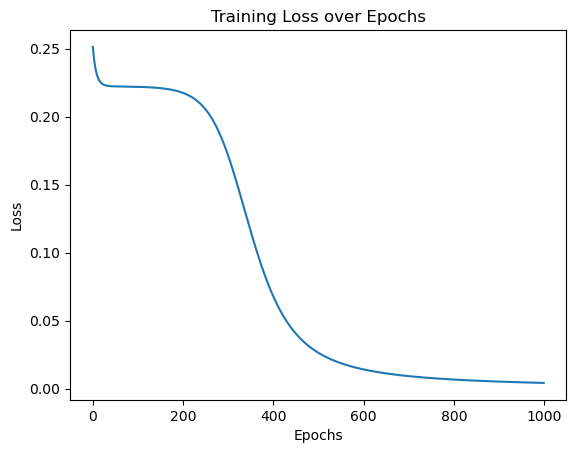

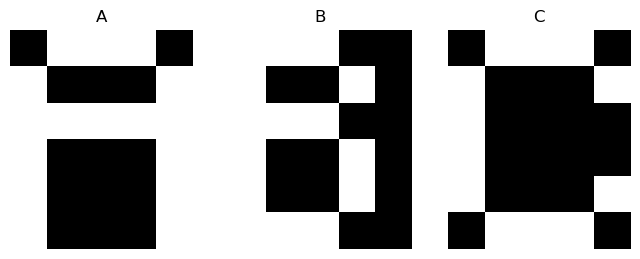

In [2]:
# Neural Network from Scratch for Classifying Letters A, B, C
# Using only NumPy

import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# Step 1: Define Input Data
# ---------------------------

# Each letter is a 5x6 grid (binary pixels) flattened into 1D (30 features)

A = np.array([
    [0,1,1,1,0],
    [1,0,0,0,1],
    [1,1,1,1,1],
    [1,0,0,0,1],
    [1,0,0,0,1],
    [1,0,0,0,1]
]).flatten()

B = np.array([
    [1,1,1,0,0],
    [1,0,0,1,0],
    [1,1,1,0,0],
    [1,0,0,1,0],
    [1,0,0,1,0],
    [1,1,1,0,0]
]).flatten()

C = np.array([
    [0,1,1,1,0],
    [1,0,0,0,1],
    [1,0,0,0,0],
    [1,0,0,0,0],
    [1,0,0,0,1],
    [0,1,1,1,0]
]).flatten()

X = np.array([A, B, C])   # input features
y = np.array([[1,0,0], [0,1,0], [0,0,1]])  # one-hot encoded labels (A,B,C)

# Normalize input (0 or 1 → keep as float)
X = X.astype(float)

# ---------------------------
# Step 2: Neural Network Setup
# ---------------------------

input_size = X.shape[1]  # 30 pixels
hidden_size = 10         # hidden neurons
output_size = 3          # classes (A, B, C)
lr = 0.1                 # learning rate
epochs = 1000            # training iterations

# Initialize weights
np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))

# Activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Loss function (MSE)
def mse_loss(y_true, y_pred):
    return np.mean(np.square(y_true - y_pred))

# ---------------------------
# Step 3: Training Loop
# ---------------------------

losses = []

for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    # Loss
    loss = mse_loss(y, a2)
    losses.append(loss)

    # Backpropagation
    d_a2 = (a2 - y)  # derivative of loss w.r.t a2
    d_z2 = d_a2 * sigmoid_derivative(a2)
    dW2 = np.dot(a1.T, d_z2)
    db2 = np.sum(d_z2, axis=0, keepdims=True)

    d_a1 = np.dot(d_z2, W2.T)
    d_z1 = d_a1 * sigmoid_derivative(a1)
    dW1 = np.dot(X.T, d_z1)
    db1 = np.sum(d_z1, axis=0, keepdims=True)

    # Update weights
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2

    # Print progress
    if epoch % 200 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# ---------------------------
# Step 4: Evaluation
# ---------------------------

print("\nFinal Predictions:")
predictions = np.argmax(a2, axis=1)
labels = ["A", "B", "C"]
for i, pred in enumerate(predictions):
    print(f"Input {labels[i]} predicted as {labels[pred]}")

# Plot training loss
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs")
plt.show()

# Visualize letters
fig, axs = plt.subplots(1, 3, figsize=(8,3))
for i, letter in enumerate([A,B,C]):
    axs[i].imshow(letter.reshape(6,5), cmap="gray")
    axs[i].set_title(labels[i])
    axs[i].axis("off")
plt.show()
